In [21]:
# https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C
import mglearn, sys, os, sklearn, math

from IPython.display import display
from scipy import sparse

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d

import seaborn as sns
import pandas as pd
import numpy as np
import graphviz

from sklearn.datasets import (load_breast_cancer,
                              load_boston,
                              make_blobs,
                              make_moons,
                              make_circles,
                             load_iris)
from mglearn.datasets import make_wave, make_forge, load_extended_boston

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

(26, 2)


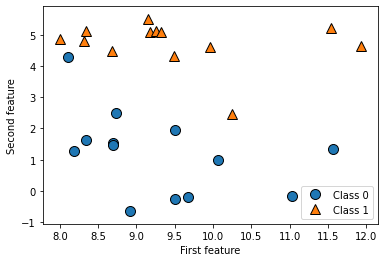

In [2]:
X, y = make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')

plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8, 7)

print(X.shape)

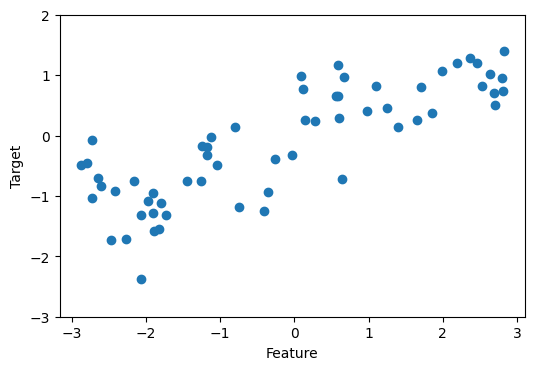

In [3]:
X, y = make_wave(n_samples=60)
plt.plot(X, y, 'o')
plt.ylim(-3, 2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.rcParams['figure.figsize'] = (6, 6)

In [2]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(cancer.data.shape)

(569, 30)


In [6]:
print('Sample counts per class: \n')
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class: 

{'malignant': 212, 'benign': 357}


In [ ]:
print(cancer.feature_names)

In [8]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [9]:
X, y = load_extended_boston()
print(X.shape)

(506, 104)


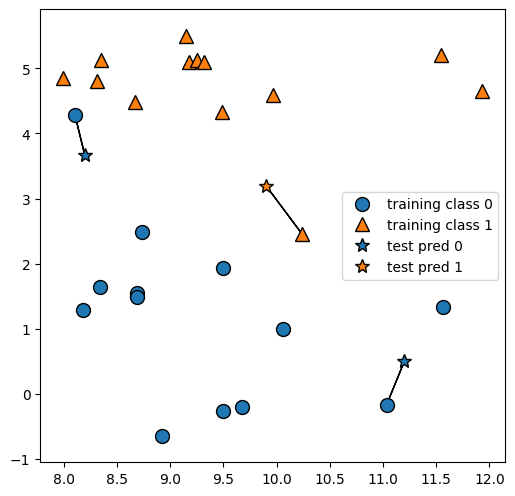

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

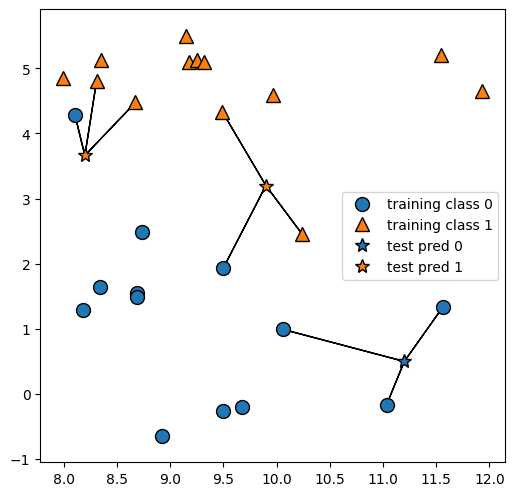

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
X, y = make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('Test set predictions: {}'.format(clf.predict(X_test)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


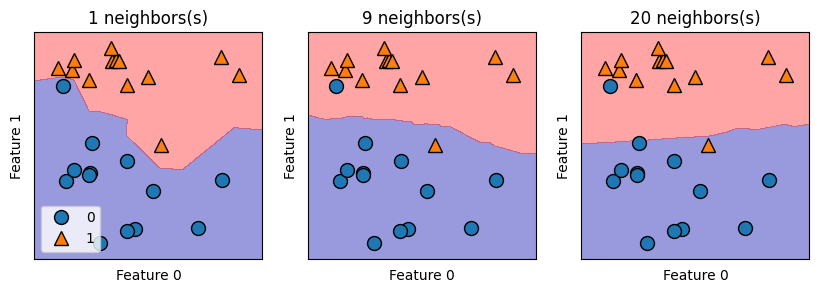

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 9, 20], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbors(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=3)

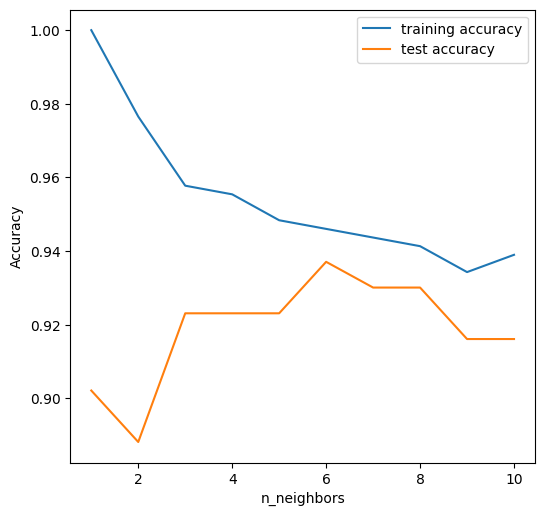

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [18]:
print(reg.score(X_test, y_test))

0.8344172446249605


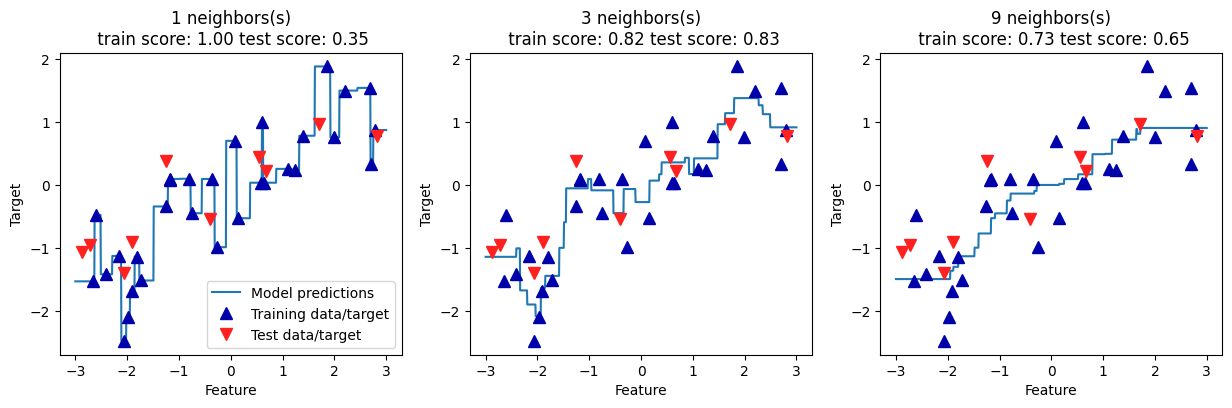

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} neighbors(s)\n train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target',
               'Test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


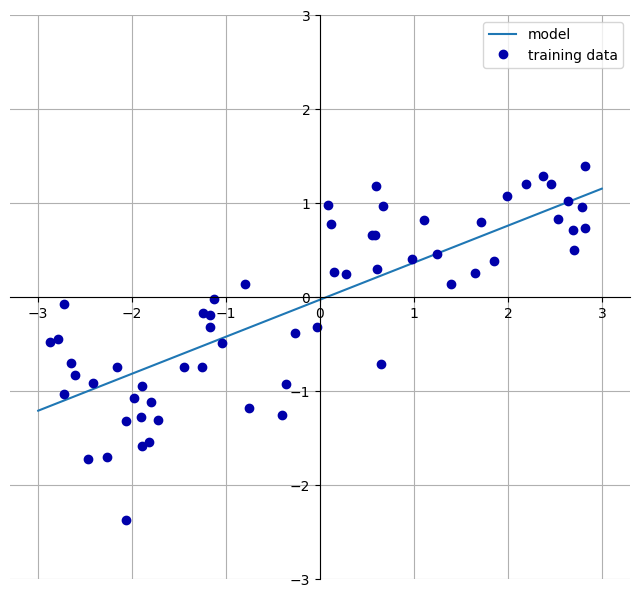

In [20]:
mglearn.plots.plot_linear_regression_wave()

In [21]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[0.39390555]
-0.031804343026759746
0.6700890315075756
0.65933685968637


In [22]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01 -1.76611

In [23]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744758


In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369616
0.6359411489177313


In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001993
0.7722067936480165


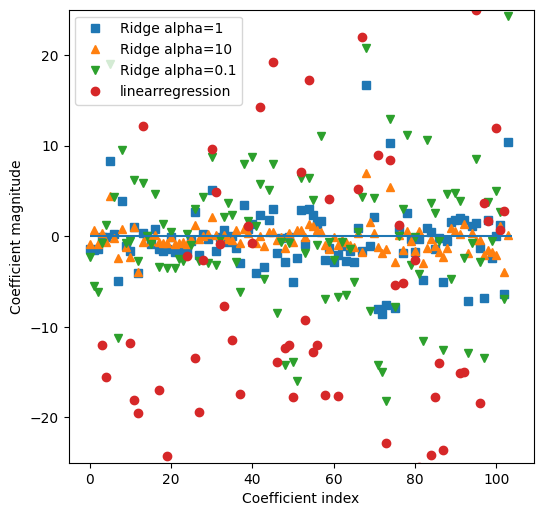

In [26]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='linearregression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

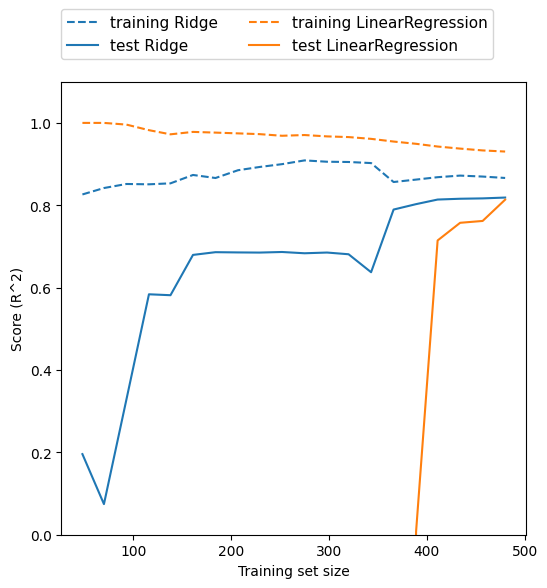

In [27]:
mglearn.plots.plot_ridge_n_samples()

In [28]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114607
0.20937503255272294
4


In [29]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0))

0.8962226511086497
0.7656571174549981
33


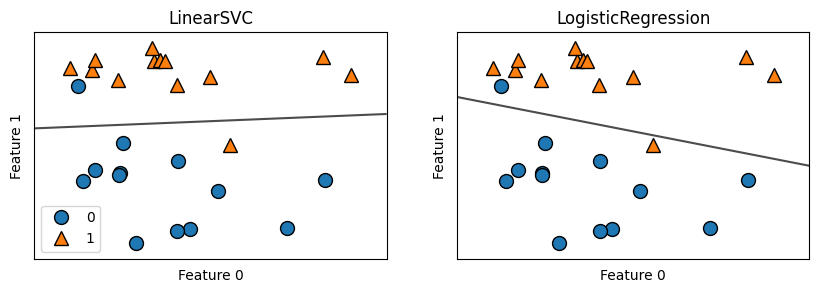

In [30]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=100000),
                      LogisticRegression(max_iter=100000)],
                     axes):
    
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False,
                                    eps=0.5, ax=ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

    axes[0].legend()

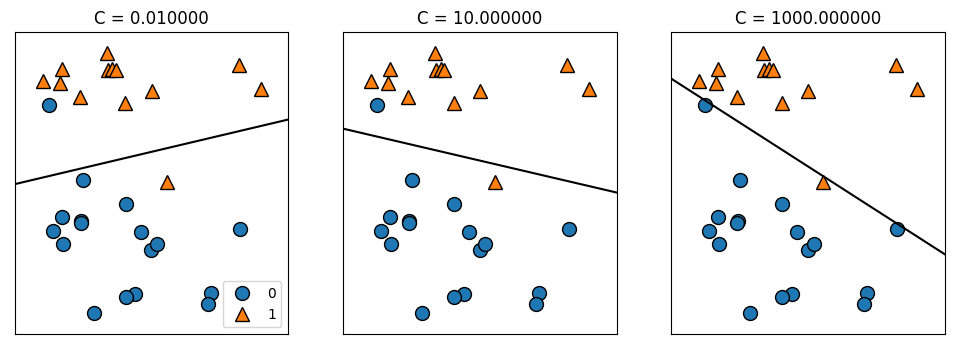

In [31]:
mglearn.plots.plot_linear_svc_regularization()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=30)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9553990610328639
0.965034965034965


In [33]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9835680751173709
0.9790209790209791


In [34]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9530516431924883
0.9440559440559441


In [ ]:
plt.plot(logreg.coef_.T, 's', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-4, 5)
plt.legend()

In [ ]:
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', 
                               solver='liblinear', 
                               max_iter=10000).fit(X_train, y_train)
    print('Accuracy w C = %.3f: %.3f' % (C, lr_l1.score(X_train, y_train)))
    print('Accuracy w C = %.3f: %.3f' % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.legend(loc=3)

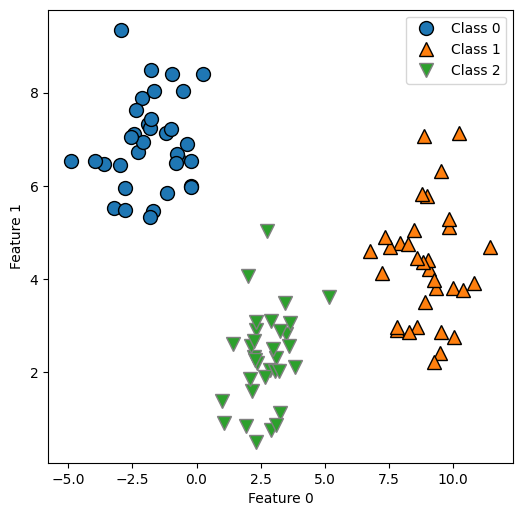

In [37]:
# one vs. rest approach for multiclass classification
X, y = make_blobs(random_state=38)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [38]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


Text(0, 0.5, 'Feature 1')

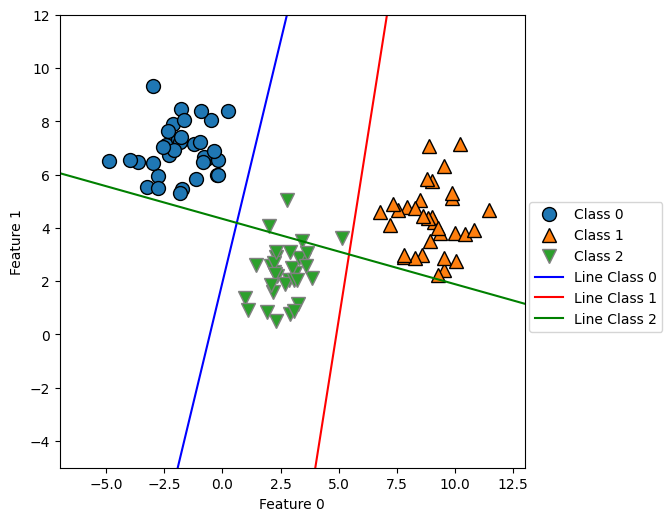

In [39]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

plt.xlim(-7, 13)
plt.ylim(-5, 12)
plt.legend(['Class 0', 'Class 1', 'Class 2',
            'Line Class 0', 'Line Class 1', 'Line Class 2'],
           loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

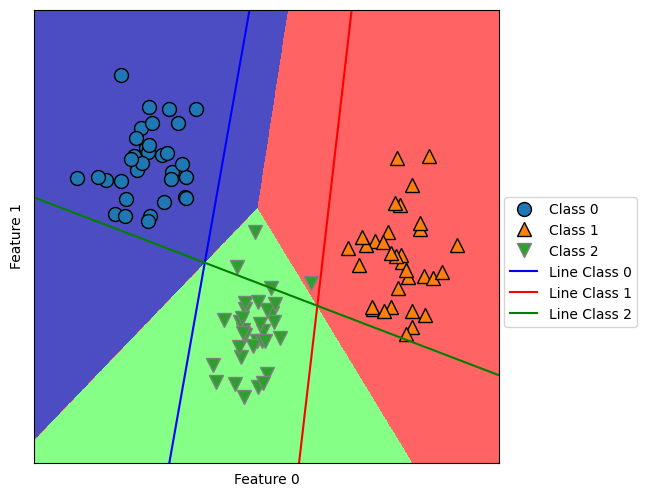

In [40]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2',
            'Line Class 0', 'Line Class 1', 'Line Class 2'],
           loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [ ]:
mglearn.plots.plot_animal_tree()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=30)
tree = DecisionTreeClassifier(max_depth=4, random_state=11)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9812206572769953
0.9230769230769231


In [43]:
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

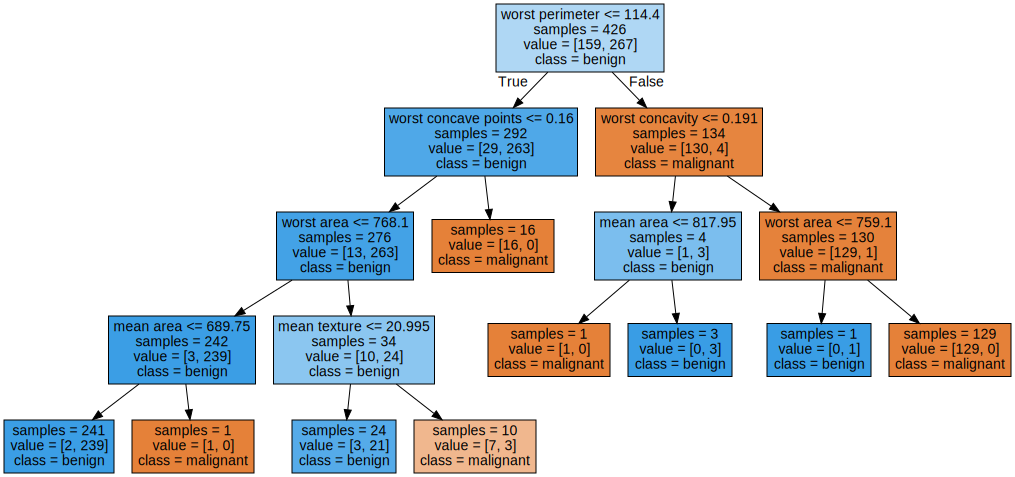

In [44]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [45]:
tree.feature_importances_

array([0.        , 0.02510931, 0.        , 0.01860648, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.74940368, 0.03613212, 0.        ,
       0.        , 0.02300559, 0.14774282, 0.        , 0.        ])

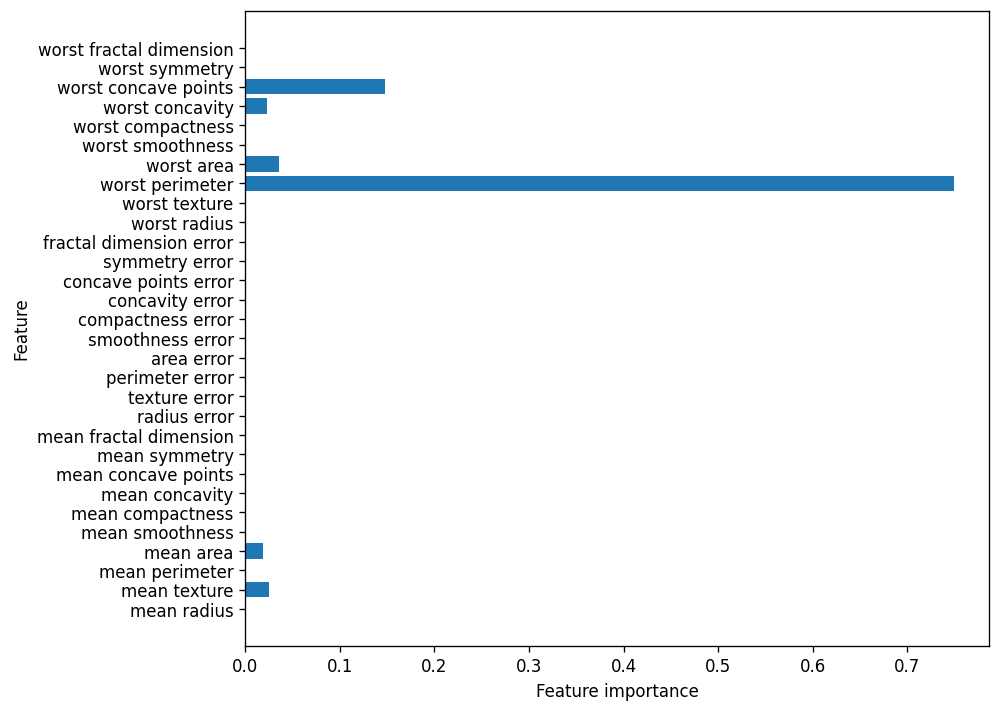

In [46]:
def plot_feature_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(range(n_feat), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (8, 7)
plot_feature_importances(tree)

In [ ]:
tree2 = mglearn.plots.plot_tree_not_monotone()
display(tree2)

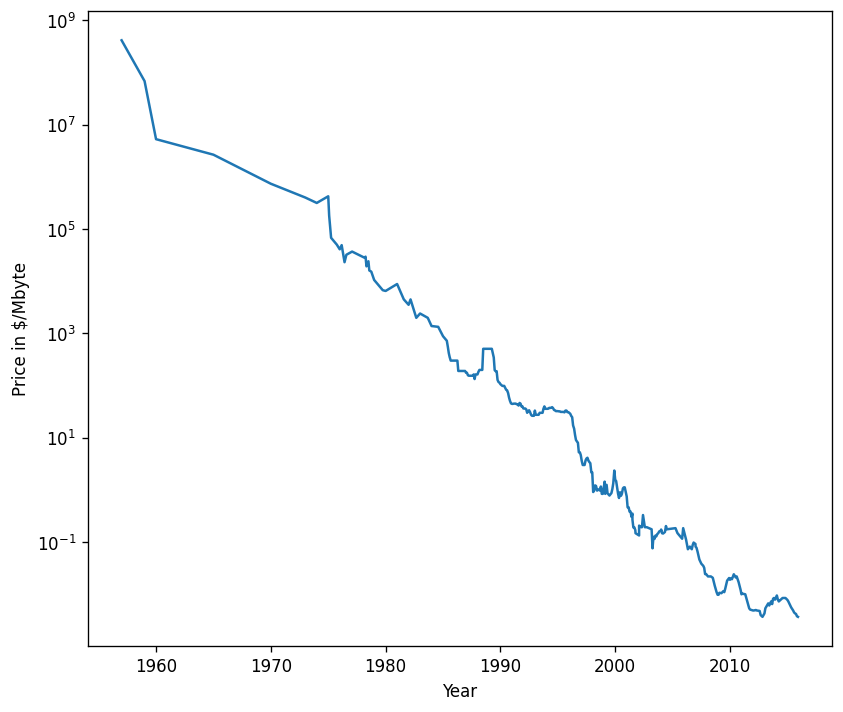

In [48]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')
plt.rcParams['figure.figsize'] = (4, 4)

In [49]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [50]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

In [51]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [52]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

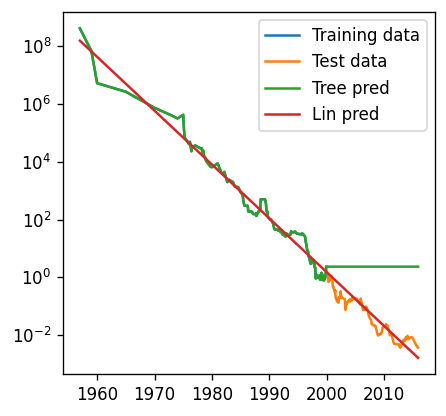

In [53]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree pred')
plt.semilogy(ram_prices.date, price_lr, label='Lin pred')
plt.legend()
plt.rcParams['figure.figsize'] = (6, 6)

In [66]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=21)

forest = RandomForestClassifier(n_estimators=5, random_state=1)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9733333333333334
0.84


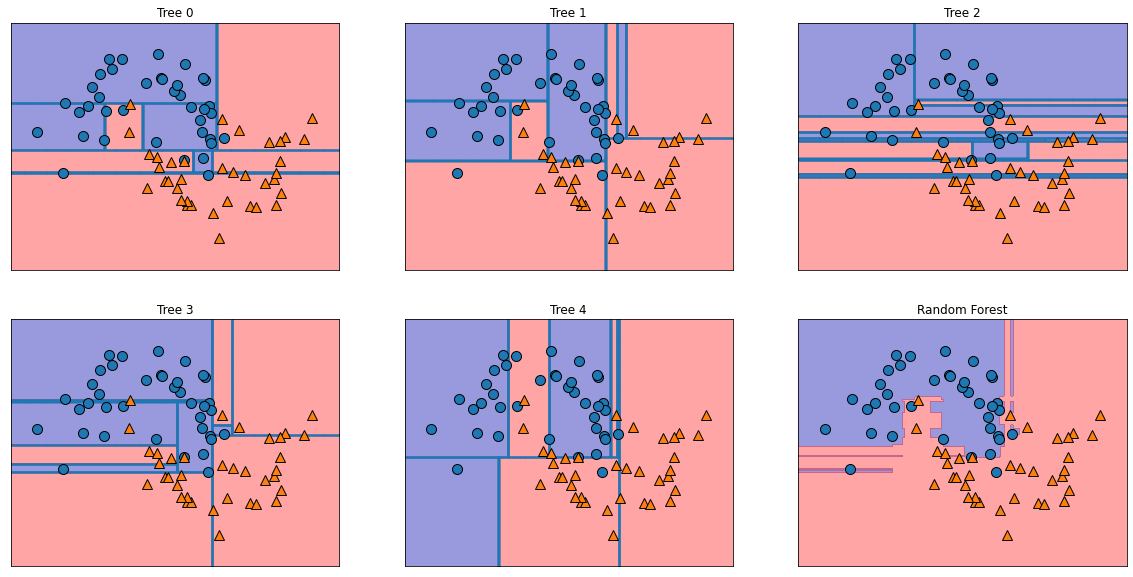

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True,
                                ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=21)

forest = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=4)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.965034965034965


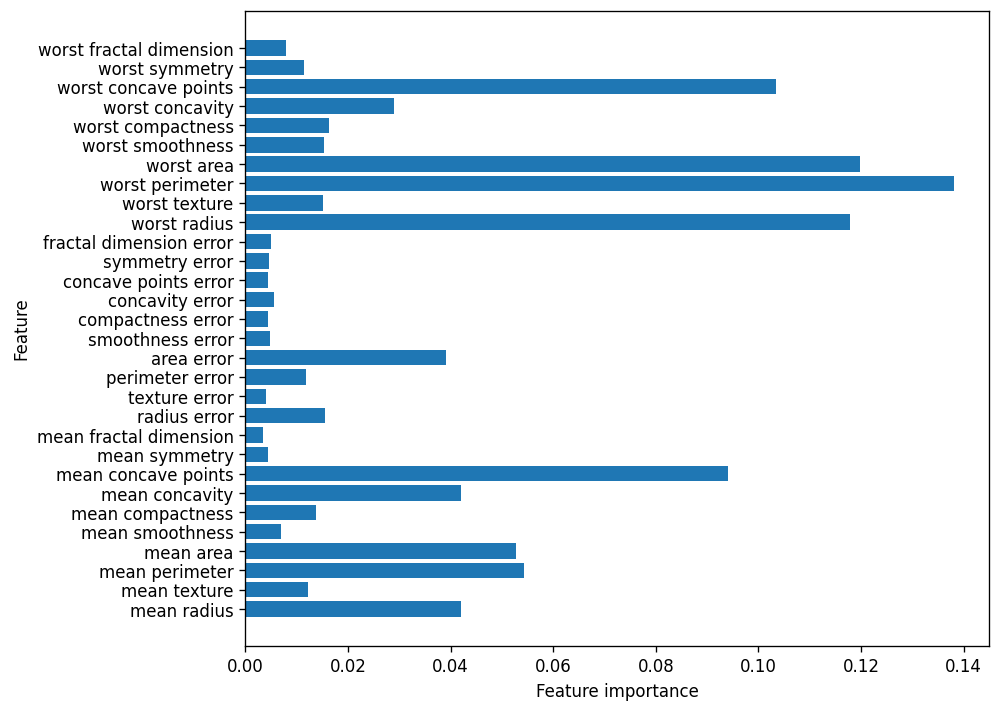

In [85]:
plot_feature_importances(forest)
plt.rcParams['figure.figsize'] = (8, 7)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
gbc = GradientBoostingClassifier(random_state=1, max_depth=1, learning_rate=0.01)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.9483568075117371
0.9020979020979021


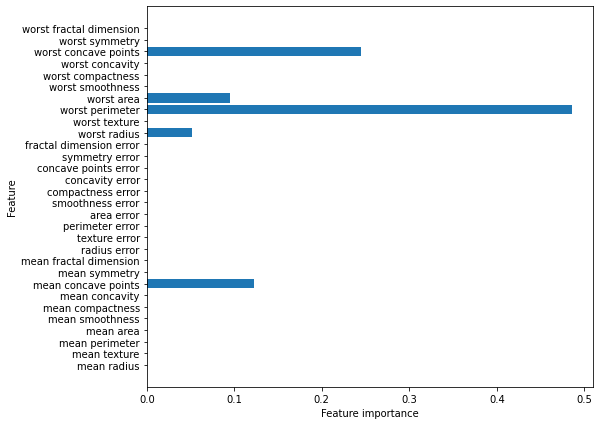

In [99]:
plot_feature_importances(gbc)
plt.rcParams['figure.figsize'] = (8, 7)

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

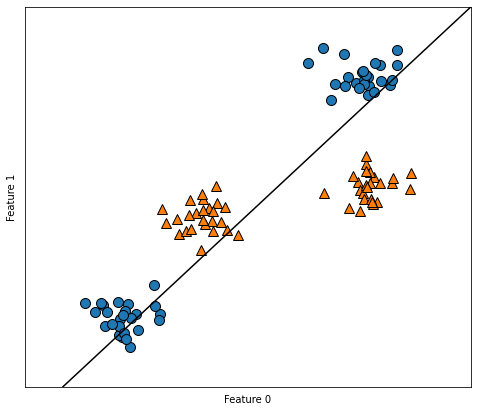

In [103]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [ ]:
X_new = np.hstack([X, X[:, 1:]**2])
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

mask = y == 0
ax.scatter(X_new[mask, 0],
           X_new[mask, 1],
           X_new[mask, 2],
           c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0],
           X_new[~mask, 1],
           X_new[~mask, 2],
           c='r',
           marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

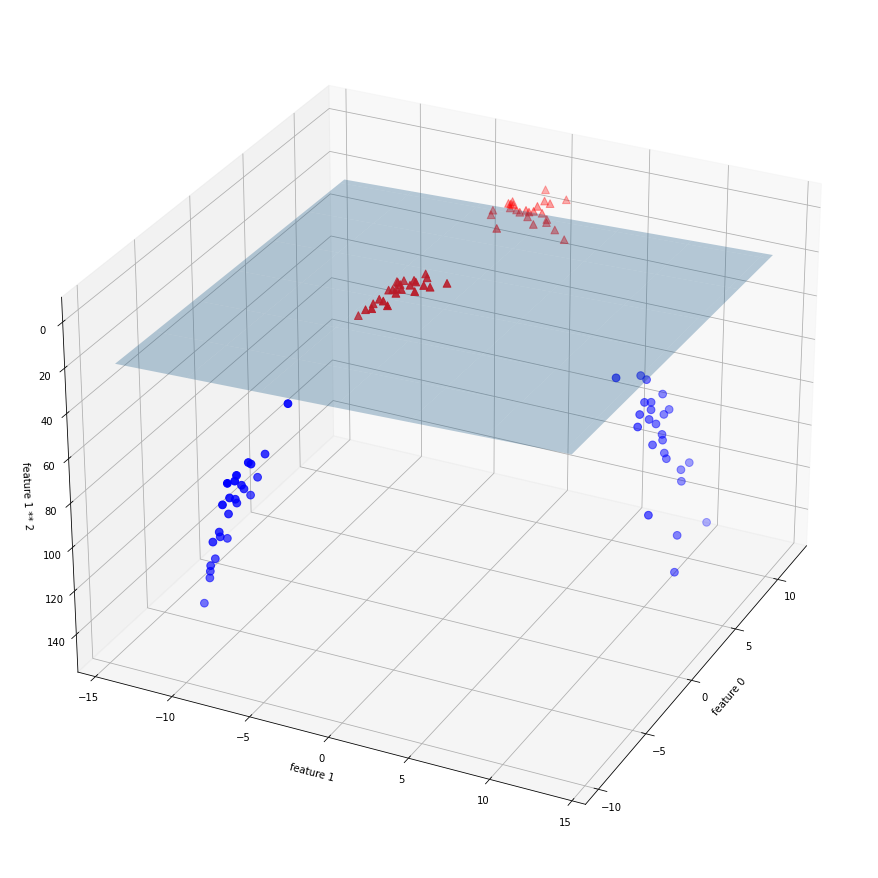

In [143]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept / -coef[2])

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0],
           X_new[mask, 1],
           X_new[mask, 2],
           c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0],
           X_new[~mask, 1],
           X_new[~mask, 2],
           c='r',
           marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

plt.rcParams['figure.figsize'] = (12, 12)

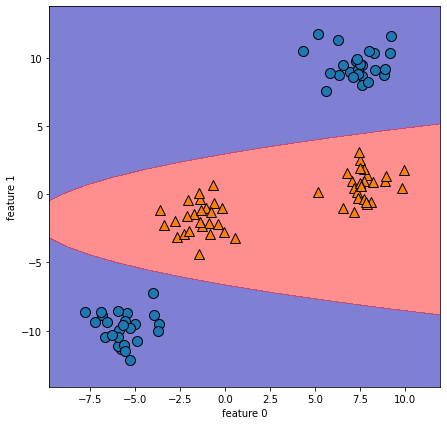

In [145]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape),
             levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.rcParams['figure.figsize'] = (7, 7)

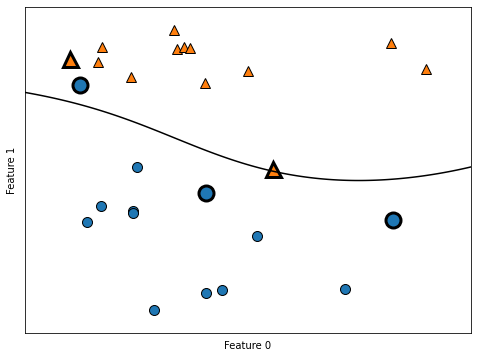

In [156]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'],
                 ncol=4, loc=(0.9, 1.2))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.903755868544601
0.9370629370629371


In [ ]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('feature index')
plt.ylabel('feature magnitude')
plt.yscale('log')

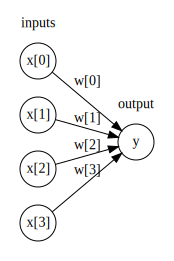

In [6]:
display(mglearn.plots.plot_logistic_regression_graph())

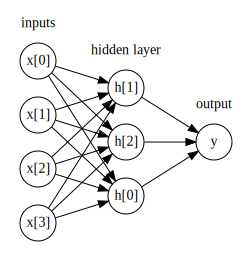

In [7]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

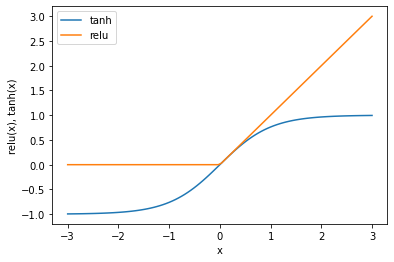

In [8]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

Text(0, 0.5, 'Feature 1')

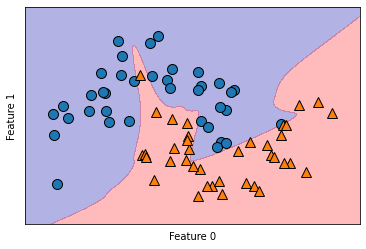

In [21]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', max_iter=10000,
                    hidden_layer_sizes=[200,200]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [11]:
# first neural network

In [22]:
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.92


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh',
                    max_iter=10000).fit(X_train, y_train)
#mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
#mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
#plt.xlabel('Feature 0')
#plt.ylabel('Feature 1')
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

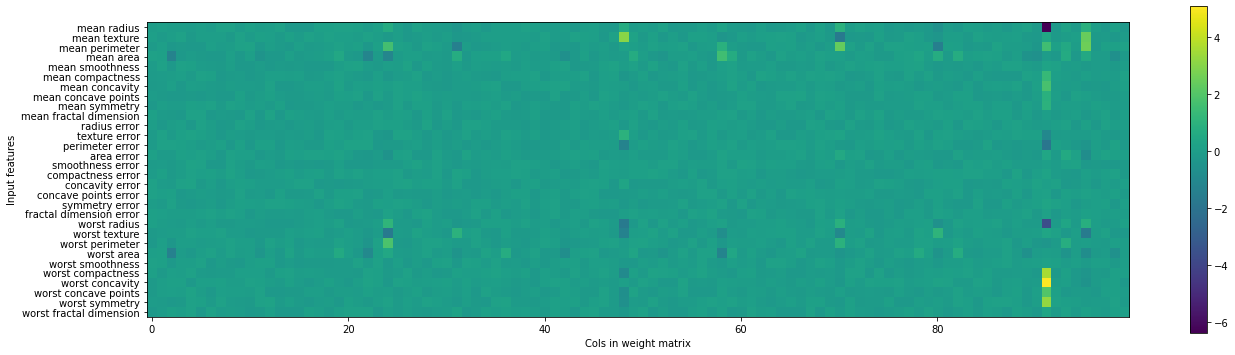

In [34]:
plt.figure(figsize=(22, 6))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Cols in weight matrix')
plt.ylabel('Input features')
plt.colorbar()

In [4]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]

In [7]:
X_train, X_test, y_train, y_test, y_train_named, y_test_named = \
train_test_split(X, y_named, y, random_state=1)

In [9]:
gbrt = GradientBoostingClassifier(random_state=1)
gbrt.fit(X_train, y_train_named)
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)
print(gbrt.decision_function(X_test)[:6])

(25, 2)
(25,)
[-8.08850597 -6.51191263  3.47489438 -3.65506335  4.31493443 -0.13520973]


In [12]:
print(gbrt.decision_function(X_test) > 0)
print('\n{}'.format(gbrt.predict(X_test)))

[False False  True False  True False False False False  True  True False
  True False  True  True  True  True  True  True False  True False  True
 False]

[0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0]


In [14]:
greater_than_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_than_zero]
print(gbrt.classes_[greater_than_zero])
print(np.all(pred == gbrt.predict(X_test)))

[0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0]
True


In [15]:
desc_f = gbrt.decision_function(X_test)
print(np.min(desc_f))
print(np.max(desc_f))

-8.088505967306803
4.849835321699453


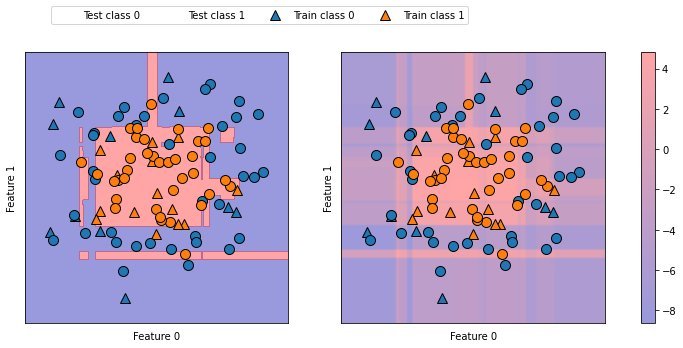

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'],
               ncol=4, loc=(0.1, 1.1))

In [18]:
print(gbrt.predict_proba(X_test).shape)
print(gbrt.predict_proba(X_test[:6]))

(25, 2)
[[9.99693046e-01 3.06953905e-04]
 [9.98516568e-01 1.48343170e-03]
 [3.00350653e-02 9.69964935e-01]
 [9.74792016e-01 2.52079843e-02]
 [1.31910950e-02 9.86808905e-01]
 [5.33751030e-01 4.66248970e-01]]


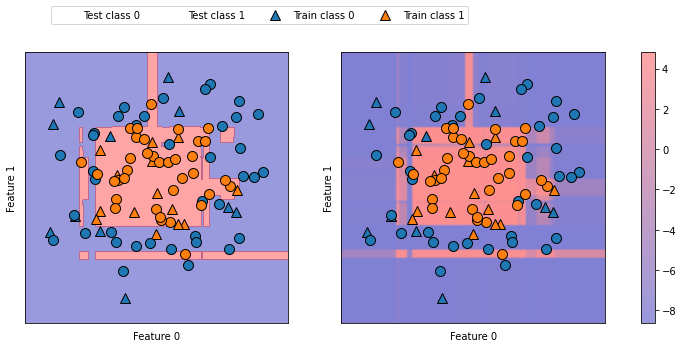

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image_2 = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5,
                                              cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'],
               ncol=4, loc=(0.1, 1.1))

In [20]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [24]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
gbrt.fit(X_train, y_train)
print(gbrt.decision_function(X_test).shape)
print(gbrt.decision_function(X_test)[:6, :])

(38, 3)
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99064144 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [26]:
np.argmax(gbrt.decision_function(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [27]:
gbrt.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [30]:
print(gbrt.predict_proba(X_test).shape)
print(gbrt.predict_proba(X_test)[:6])
print(gbrt.predict_proba(X_test)[:6].sum(axis=1))

(38, 3)
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09817546 0.11005928 0.79176526]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
[1. 1. 1. 1. 1. 1.]


In [32]:
logreg = LogisticRegression(max_iter=1000)

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print(logreg.classes_)
print(logreg.predict(X_test)[:10])

['setosa' 'versicolor' 'virginica']
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


In [34]:
np.argmax(logreg.decision_function(X_test), axis=1)[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [35]:
logreg.classes_[np.argmax(logreg.decision_function(X_test), axis=1)][:10]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')